# AI-Driven Sentiment Analysis on Nike Product Reviews
This notebook demonstrates how NLP techniques can be used for sentiment analysis and keyword extraction on real-world product reviews, using Nike as the focus brand.

## 1. Load Dataset

In [1]:
import pandas as pd

# Load dataset
url = 'nike_reviews_dataset.csv'
df = pd.read_csv(url)
df.head()

,review
0,These Nike shoes are very comfortable and styl...
1,The quality is disappointing. Sole came off af...
2,Amazing performance shoes. Great grip and supp...
3,Not worth the price. Looks good but not durabl...
4,Perfect fit! Lightweight and very breathable. ...


## 2. Sentiment Analysis using TextBlob

In [2]:
from textblob import TextBlob

df["polarity"] = df["review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment"] = df["polarity"].apply(lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral"))
df[["review", "sentiment"]]

,review,sentiment
0,These Nike shoes are very comfortable and styl...,Positive
1,The quality is disappointing. Sole came off af...,Negative
2,Amazing performance shoes. Great grip and supp...,Positive
3,Not worth the price. Looks good but not durabl...,Positive
4,Perfect fit! Lightweight and very breathable. ...,Positive
5,Too narrow and caused discomfort. Expected bet...,Neutral
6,I love the color and feel. Got lots of complim...,Positive
7,"Shoes are okay, but delivery was delayed and t...",Positive
8,Superb cushioning and perfect for running. Wor...,Positive
9,Very poor build quality. Started tearing after...,Negative


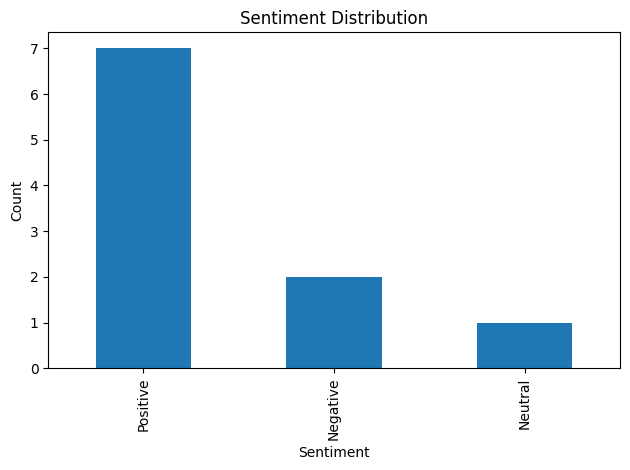

In [3]:
import matplotlib.pyplot as plt

sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 3. Keyword Extraction using CountVectorizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

import pandas as pd
keywords_df = pd.DataFrame(words_freq, columns=['Keyword', 'Frequency'])
keywords_df

,Keyword,Frequency
0,shoes,3
1,nike,2
2,quality,2
3,worth,2
4,perfect,2
5,comfortable,1
6,stylish,1
7,loved,1
8,design,1
9,disappointing,1


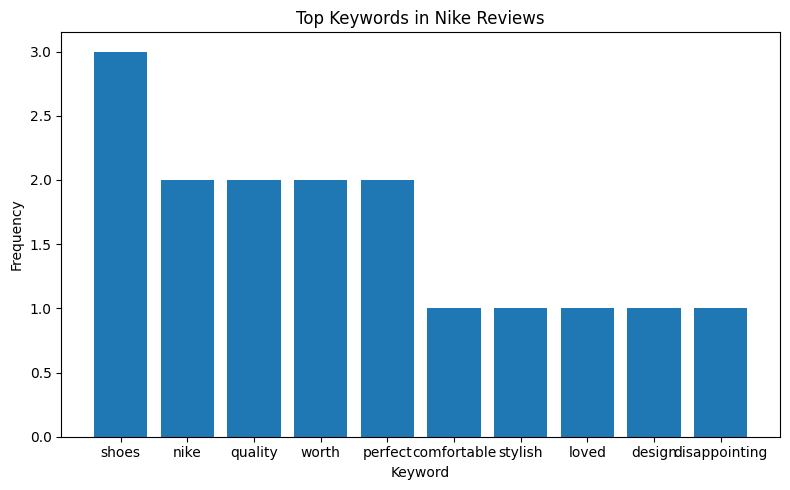

In [5]:
plt.figure(figsize=(8, 5))
plt.bar(keywords_df['Keyword'], keywords_df['Frequency'])
plt.title('Top Keywords in Nike Reviews')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 4. Conclusion
This notebook successfully applies NLP techniques to extract sentiment and common discussion themes from customer feedback. These insights can directly inform marketing strategies.